In [421]:
import numpy as np
import matplotlib.pyplot as plt

theta = 1e-30
p_head = 0.49

V_s = np.zeros(101)
#V_s = np.random.uniform(low = 0, high = 1, size = 101)
#V_s[0] = 0
#V_s[100] = 0
pi_s = np.zeros(101, dtype = int)

def actions_s(s):
    return [x+1 for x in list(range(s))]

In [423]:
def get_value_for_state_action(s, a, V_s, p_head):
    
    r_win = 0
    r_lose = 0
    
    next_state_win = s + a
    next_state_lose = s - a

    if next_state_win >= 100:
        next_state_win = 100
        r_win = 1
    elif next_state_lose <= 0:
        next_state_lose = 0
        r_lose = 0
        
    return p_head * (r_win + V_s[next_state_win]) + (1 - p_head) * (r_lose + V_s[next_state_lose])

def get_max_for_state(s, V_s, p_head):
    actions = actions_s(s)
    maxi = -99999
    maxi_index = -999
    for action in actions:
        x = get_value_for_state_action(s, action, V_s, p_head)
        if x > maxi:
            maxi = x
            maxi_index = action
    return maxi, maxi_index

i = 0
while(1):
    i += 1
    delta = 0
    for s in range(len(V_s)):
        if s in (0, 100):
            continue
            
        v = V_s[s]
        maxi, action = get_max_for_state(s, V_s, p_head)
        V_s[s] = maxi
        pi_s[s] = action
        delta = max(delta, abs(v - V_s[s]))

    if delta < theta:
        break
        
print(i)

32


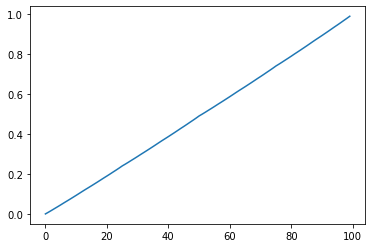

In [424]:
%matplotlib inline
plt.plot(V_s[:100])

<BarContainer object of 101 artists>

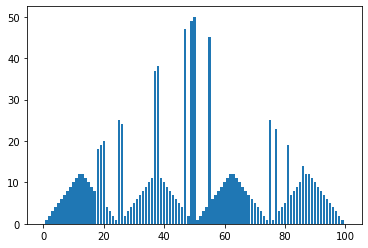

In [425]:

plt.bar(range(101), pi_s)


In [426]:
pi_s[81]

19